In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
df = pd.read_csv('~/ds_bootcamp/ds-phase-0/learning/datasets/data.csv', index_col='Unnamed: 0')

### Изучение общей информации по данным

#### Общая информация по данным

In [27]:
print('Длина списка, кол-во колонок', df.shape)
print('Список колонок', df.columns.to_list())

Длина списка, кол-во колонок (23368, 24)
Список колонок ['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление']


In [28]:
print('Общая информация по датасету', df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 23368 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            23368 non-null  int64  
 1   Количество комнат         22327 non-null  object 
 2   Тип                       23368 non-null  object 
 3   Метро                     22053 non-null  object 
 4   Адрес                     23368 non-null  object 
 5   Площадь, м2               23368 non-null  object 
 6   Дом                       23368 non-null  object 
 7   Парковка                  9951 non-null   object 
 8   Цена                      23368 non-null  object 
 9   Телефоны                  23368 non-null  object 
 10  Описание                  23368 non-null  object 
 11  Ремонт                    20613 non-null  object 
 12  Площадь комнат, м2        14458 non-null  object 
 13  Балкон                    15390 non-null  object 
 14  Окна       

Большую часть датасета составляют объекты - 22, вероятнее всего текстовые данные. 
Числовых признака - 2. Большое количество пропусков среди колонок.
Посмотрим распределение по числовым признакам.

In [29]:
df.describe()

,ID объявления,"Высота потолков, м"
count,2.336800e+04,11206.00000
mean,2.676265e+08,2.98345
std,1.876862e+07,7.61472
min,1.072986e+08,1.20000
25%,2.712663e+08,2.64000
50%,2.739030e+08,2.64000
75%,2.746872e+08,2.80000
max,2.750064e+08,320.00000


#### Общая информация по пропускам

In [66]:
nan_count = df.isna().sum()
nan_percent = df.isna().mean().round(4) * 100
nan_df = pd.concat([nan_count, nan_percent], axis=1)
nan_df.columns = ['count_of_nan', 'percentage_of_nan']
nan_df.query('count_of_nan > 0').sort_values(by='percentage_of_nan', ascending=False)\
.style.background_gradient('coolwarm')

,count_of_nan,percentage_of_nan
Серия дома,21205,90.740000
Название ЖК,17520,74.970000
Парковка,13417,57.420000
"Высота потолков, м",12162,52.050000
Мусоропровод,10522,45.030000
"Площадь комнат, м2",8910,38.130000
Балкон,7978,34.140000
Окна,6613,28.300000
Можно с детьми/животными,6096,26.090000
Лифт,5500,23.540000


#### Общая информация по явным дубликатам

In [ ]:
df.duplicated().sum()

0

*Вывод: при первом знакомстве с данными видим в файле 24 признака и 23368 объектов, есть много пропусков. Целевой признак, а именно цену нужно выделить в отдельный столбец в типе float. Видим пропуски в 15 признаках, в одно из которых(Серия дома) их количество более 90% от общего количества данных. Ниже более детально разберем их причины и возможность исправления. Явные дубликаты в данных отсутствуют.*

### Предобработка признаков

#### Цена - целевой признак

*Преобразуем первую цифру в столбце в тип float и сохраним в отдельную колонку 'Стоимость аренды' - этот признак и будет в дальнейшем целевым. Проверим на пропуски. Посмотрим распределение признака на гистограмме. Из колонки Цена можно извлечь доп признак "Стоимость залога", который также считаем существенным для машинного обучения.*

In [ ]:
df['Стоимость аренды'] = df['Цена'].str.extract('(\d+\.?\d*)').astype('float')
df[['Стоимость аренды']].head(5)

,Стоимость аренды
0,500000.0
1,500000.0
2,500000.0
3,400000.0
4,225000.0


In [ ]:
print('Количество пропусков:', df['Стоимость аренды'].isna().sum())

Количество пропусков: 0


*Посмотрим распределение значений в целевом признаке*

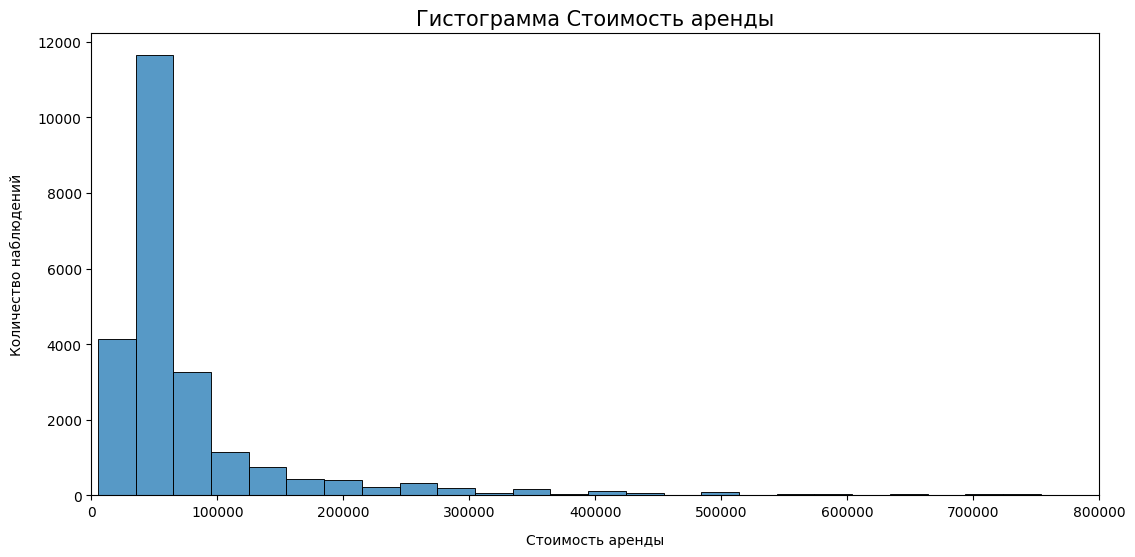

In [ ]:
plt.figure(figsize=[13, 6])
sns.histplot(data=df['Стоимость аренды'], bins=100)
plt.title('Гистограмма Стоимость аренды', fontsize=15)
plt.xlabel('Стоимость аренды', labelpad=10, fontsize=10) #привести к норм цифрам+boxplot
plt.ylabel('Количество наблюдений', labelpad=10, fontsize=10)
plt.xlim(0, 800000) 
plt.show();

#### ID объявления

*Данный столбец не влияет на цену, не принесет никакой информативности для предстоящего машинного обучения*

Количество комнат

In [37]:
print('Количечество уникальных значений:', df['Количество комнат'].nunique())
print('Список уникальных значений:', *list(df['Количество комнат'].unique()))
print('Количество пропусков:', df['Количество комнат'].isna().sum())

Количечество уникальных значений: 24
Список уникальных значений: 4 4, Оба варианта 2 3 5, Оба варианта 3, Изолированная 5 5, Изолированная 2, Оба варианта 3, Оба варианта 6 1 4, Изолированная 6, Оба варианта 2, Изолированная nan 2, Смежная 4, Смежная 3, Смежная 6, Изолированная 1, Изолированная 1, Оба варианта 5, Смежная 6, Смежная 1, Смежная
Количество пропусков: 1041


*Это важный признак нужно его оставить. Количество уникальных значений - 24. Нужно предобработать этот признак, преобразовав в тип int, выделив число из str. Пропусков менее 5%, после преобразования их можно заполнить медианным значанием.*

ТИП

In [38]:
print('Количечество уникальных значений:', df['Тип'].nunique())
print('Список уникальных значений:', *list(df['Тип'].unique()))
print('Количество пропусков:', df['Тип'].isna().sum())

Количечество уникальных значений: 1
Список уникальных значений: Квартира
Количество пропусков: 0


*В данном столбце нет пропусков, уникальное значение одно - "Квартира". Это не несет никакой информативности для машинного обучения и на цену не влияет. Данный признак нужно удалить.*

Метро

In [42]:
print('Количечество уникальных значений:', df['Метро'].nunique())
print('Количество пропусков:', df['Метро'].isna().sum())
print(list(df['Метро'].loc[:3]))

Количечество уникальных значений: 5866
Количество пропусков: 1315
['м. Смоленская (9 мин пешком)', 'м. Смоленская (8 мин пешком)', 'м. Смоленская (7 мин пешком)', 'м. Смоленская (3 мин пешком)']


*Имеем 5866 уникальных значений, менее 6% пропусков. Время до метро - важная информация, имеет смысл сделать из нее доп признак. Также можно выделить в дом признак названия метро, и потом их закодировать, если таких признаков не будет слишком много*

Адрес

In [43]:
print('Количечество уникальных значений:', df['Адрес'].nunique())

Количечество уникальных значений: 12850


*Имеем более 12 тыс. уникальных значение. Данный признак можно удалить, более информативным является признак с наименованием метро, который мы планируем создать*

Дом

In [44]:
print('Количечество уникальных значений:', df['Дом'].nunique())

Количечество уникальных значений: 2565


*Имеем 2565 уникальных значений, пропусков нет. Можно создать из этого признака 3 новых доп признака: этаж продаваемой квартиры, этажность дома и тип дома. Затем типе дома пропуски заменить заглушками.*

Парковка

In [47]:
print('Количечество уникальных значений:', df['Парковка'].nunique())
print('Список уникальных значений:', list(df['Парковка'].unique()))
print('Количество пропусков:', df['Парковка'].isna().sum())

Количечество уникальных значений: 5
Список уникальных значений: ['подземная', nan, 'наземная', 'открытая', 'многоуровневая', 'на крыше']
Количество пропусков: 13417


*Имеем всего 5 уникальных значений, 57% пропусков. Признак важный, закодироуем его, предварительно пропуски заполнив нулями.*

### В колонке "Площадь, м2":
1. нет нулевых значений;
2. Не установлен формат отражения информации о площади. Предлагаю оставить общую площадь, так как она есть во всех (предположительно) строках. 
   

In [51]:
print('Количечество уникальных значений:', df['Площадь, м2'].nunique())
print('Количество пропусков:', df['Площадь, м2'].isna().sum())

Количечество уникальных значений: 11255
Количество пропусков: 0


### Колонка "Телефоны" рекомендуется к удалению,  так как не несет в себе данных для ML

### Колонку "Описание" оставим на back-up, на случай, если понадобится в единичных случаях выцепить информацию. По факту она для ML нам не нужна. 

### Колонка "Ремонт":
1. Проверить на NaN
2. В строках с NaN поставить заглушку типа "Не указано"
3. Закодировать 'Дизайнерский', 'Евроремонт', 'Косметический', 'Не указано', 'Без ремонта' - 5 значений кодировки 

In [49]:
print('Количечество уникальных значений:', df['Ремонт'].nunique())
print('Список уникальных значений:', list(df['Ремонт'].unique()))
print('Количество пропусков:', df['Ремонт'].isna().sum())

Количечество уникальных значений: 4
Список уникальных значений: ['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта']
Количество пропусков: 2755


### Колонка "Площадь комнат, м2	": поскольку не указан единый формат и везде разное количество комнат, рекомендуется к удалению

### Колонка "Балкон":
1. Предлагаю закодировать: "Балкон", "Лоджия", "Отсутствует"(для пропусков или NaN)  - 3 значения кодировки 
2. Указать количество балконов/лоджий в отдельной колонке (то, что в скобках)

In [50]:
print('Количечество уникальных значений:', df['Балкон'].nunique())
print('Количество пропусков:', df['Балкон'].isna().sum())

Количечество уникальных значений: 18
Количество пропусков: 7978


### Колонка "Окна":
1. Предлагаю закодировать: "'На улицу и двор', 'Во двор', 'На улицу', 'Не указано'(для пропусков или NaN) - 4 значения кодировки 

In [52]:
print('Количечество уникальных значений:', df['Окна'].nunique())
print('Список уникальных значений:', list(df['Окна'].unique()))
print('Количество пропусков:', df['Окна'].isna().sum())

Количечество уникальных значений: 3
Список уникальных значений: [nan, 'На улицу и двор', 'Во двор', 'На улицу']
Количество пропусков: 6613


### Колонка "Санузел"

Общая информация по санузул, большая часть сета - квартиры с 1 совмещенным или раздельным санузлом, незаполненных строк - 2672.

20 уникальных значений, далее можно закодировать на 20 различных значения и просмотреть корреляцию. Возможно потребуется корректировка на уменьшение значений или пересмотр кодировки.

В зависимости от корреляции к цене совмещенного или раздельного санузла nan возможно заменить на одно из значений (т.к. хоть 1 санузел в квартире точно есть). если корреляция небольшая или её нет, можно привести просто к количеству санузлов.

In [53]:
df['Санузел'].value_counts(dropna=False).reset_index()

,Санузел,count
0,Совмещенный (1),10078
1,Раздельный (1),7158
2,NaN,2672
3,Совмещенный (2),1437
4,"Совмещенный (1), Раздельный (1)",812
5,Раздельный (2),534
6,Совмещенный (3),241
7,"Совмещенный (2), Раздельный (1)",188
8,Совмещенный (4),77
9,Раздельный (3),52


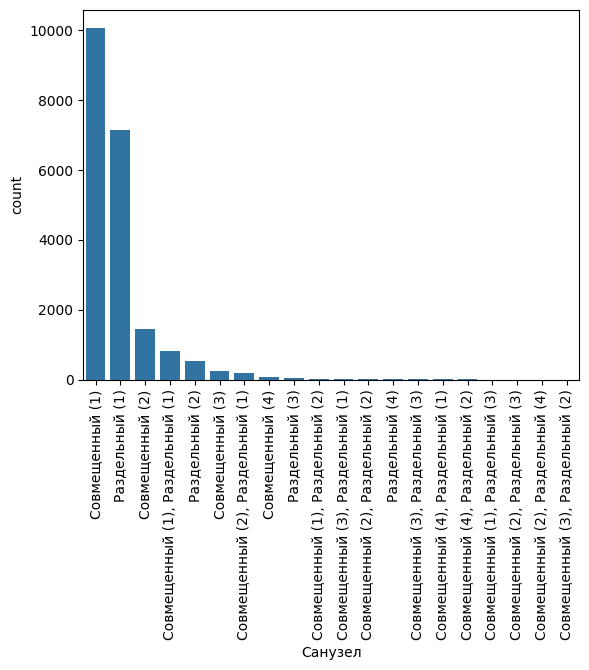

In [ ]:
sns.barplot(data=df['Санузел'].value_counts(dropna=False).reset_index(), x='Санузел', y='count')
plt.xticks(rotation=90);


### Колонка "Можно с детьми/животными"

Небольшое количество уникальных значений, далее можно закодировать на 4 различных значения и просмотреть корреляцию. Возможно потребуется корректировка, как в пункте выше.

Т.к. по Nan информацию подтянуть ниоткуда нельзя, препдоположим, что это означает, что нельзя ни с детьми, ни с животными.

In [ ]:
df['Можно с детьми/животными'].value_counts(dropna=False).reset_index()

,Можно с детьми/животными,count
0,Можно с детьми,10134
1,"Можно с детьми, Можно с животными",6899
2,NaN,6096
3,Можно с животными,239


### Колонка "Дополнительно"

528 уникальных значений, предположительно кодировка в изначальном виде не имеет. возможно придется обрабатывать текст в список и делать вывод по элементам списка.
пропусков мало, возможна большая корреляция с ценой. ясно будет после выявления цены.

In [55]:
df[['Дополнительно']].describe()

,Дополнительно
count,23011
unique,528
top,"Мебель в комнатах, Мебель на кухне, Ванна, Сти..."
freq,2896


### Колонка "Название ЖК"

17520 пропусков, в остальном много уникальных значений с малым количеством повторений. предполагаем, что корреляция есть. 
тогда все где есть название - дома более высокого класса жилья. после кодируем на 2 признака в этом ключе.

In [56]:
df['Название ЖК'].value_counts(dropna=False).reset_index()

,Название ЖК,count
0,NaN,17520
1,"Символ, 2019",61
2,"Водный, 2015",45
3,Квартал на Ленинском,37
4,"Метрополия, 2021",36
...,...,...
1794,"Помидор, 2000",1
1795,"Талисман на Дмитровском, 2022",1
1796,"LIFE-Волжская, 2012",1
1797,"Грани, 2020",1


### Колонка "Серия дома"

Заполненных строк мало, наибольшее количество встречается среди "индивидуальным проектом" в разном регистре. 
Можно предположить, что есть корреляция с ценой. тогда все остальные значения можно представить, как типовое жилье. дальше произвести кодировку по 2 признакам.

In [57]:
df['Серия дома'].value_counts(dropna=False).reset_index()

,Серия дома,count
0,NaN,21205
1,индивидуальный проект,615
2,Индивидуальный проект,139
3,П44,89
4,П44Т,63
...,...,...
389,I-510 (I-510/23БИ),1
390,КПД-4572А,1
391,Монолитный,1
392,П44т,1


### Колонка "Высота потолков, м"

Пропуски можно заменить на медиану, как наиболее стабильную мцт.

Есть явные выбросы вверх и вниз, требуется дополнительная нормализация данных.

In [61]:
df[['Высота потолков, м']].describe()


,"Высота потолков, м"
count,11206.00000
mean,2.98345
std,7.61472
min,1.20000
25%,2.64000
50%,2.64000
75%,2.80000
max,320.00000


In [60]:
df[['Высота потолков, м']].value_counts().sort_index(ascending=False)

Высота потолков, м
320.0                 2
310.0                 1
280.0                 1
265.0                 1
264.0                 2
                     ..
2.3                   3
2.2                   2
2.1                   1
2.0                   3
1.2                   1
Name: count, Length: 95, dtype: int64

### Колонка "Лифт"

Ситуация схожая с санузлами,только под NaN можно предположить отсутствие лифта. 

Можно заменить значениями суммирующими общее количество лифтов в доме (и пассажирских и грузовых) и проверить корреляцию

In [62]:
df['Лифт'].value_counts(dropna=False).reset_index()

,Лифт,count
0,Пасс (1),5911
1,NaN,5500
2,Пасс (2),4326
3,"Пасс (1), Груз (1)",3962
4,"Пасс (2), Груз (1)",1224
5,"Пасс (2), Груз (2)",654
6,Пасс (3),636
7,Пасс (4),346
8,"Пасс (3), Груз (1)",187
9,"Пасс (1), Груз (2)",185


### Колонка 'Мусоропровод'

Предположительно наличие мусоропровода должно влиять. более половины значений пропущено
Примем, что да - 2, нет - 1 или nan - 0. проверим корреляцию и далее будем делать выводы, использовать ли в конечном релизе.

In [63]:
df['Мусоропровод'].value_counts(dropna=False).reset_index()

,Мусоропровод,count
0,Да,10897
1,NaN,10522
2,Нет,1949


### Колонка "Ссылка на объявление"

Все значения уникальны и не имеют влияния на реальную цену, учитывать не будем

In [64]:
df['Ссылка на объявление']

0        https://www.cian.ru/rent/flat/271271157
1        https://www.cian.ru/rent/flat/271634126
2        https://www.cian.ru/rent/flat/271173086
3        https://www.cian.ru/rent/flat/272197456
4        https://www.cian.ru/rent/flat/273614615
                          ...                   
23363    https://www.cian.ru/rent/flat/215565511
23364    https://www.cian.ru/rent/flat/274654844
23365    https://www.cian.ru/rent/flat/268679909
23366    https://www.cian.ru/rent/flat/274807525
23367    https://www.cian.ru/rent/flat/274672243
Name: Ссылка на объявление, Length: 23368, dtype: object